## Data Preprocessing

In [267]:
import pandas as pd
import os
import re
from pathlib import Path

Import subject information

In [268]:
subjects = pd.read_csv("./data_subjects_info.csv")
subjects

,code,weight,height,age,gender
0,1,102,188,46,1
1,2,72,180,28,1
2,3,48,161,28,0
3,4,90,176,31,1
4,5,48,164,23,0
5,6,76,180,28,1
6,7,62,175,30,0
7,8,52,161,24,0
8,9,93,190,32,1
9,10,72,164,31,0


Rename files

In [269]:
"""
def rm(old_file_path, new_file_name):
    dir_path = os.path.dirname(old_file_path)
    new_file_path = os.path.join(dir_path, new_file_name)
    os.rename(old_file_path, new_file_path)

folders = os.listdir(r'A_DeviceMotion_data/')

for folder in folders:
    folder_name = folder.split('_')

    if(int(folder_name[1])<= 9):
        old_folder_path = './A_DeviceMotion_data/' + folder
        new_folder_name = folder_name[0] + "_0" + folder_name[1]
        folder = new_folder_name
        
        rm(old_folder_path, new_folder_name)

    files = os.listdir(r'./A_DeviceMotion_data/' + folder)

    for file in files:
        file_name = re.split('_|\\.', file)
        if(int(file_name[1])<= 9):
            old_file_path = './A_DeviceMotion_data/' + folder + '/' + file
            new_file_name = 'sub_0' + file_name[1] + '.csv'

            rm(old_file_path, new_file_name)
"""

'\ndef rm(old_file_path, new_file_name):\n    dir_path = os.path.dirname(old_file_path)\n    new_file_path = os.path.join(dir_path, new_file_name)\n    os.rename(old_file_path, new_file_path)\n\nfolders = os.listdir(r\'A_DeviceMotion_data/\')\n\nfor folder in folders:\n    folder_name = folder.split(\'_\')\n\n    if(int(folder_name[1])<= 9):\n        old_folder_path = \'./A_DeviceMotion_data/\' + folder\n        new_folder_name = folder_name[0] + "_0" + folder_name[1]\n        folder = new_folder_name\n        \n        rm(old_folder_path, new_folder_name)\n\n    files = os.listdir(r\'./A_DeviceMotion_data/\' + folder)\n\n    for file in files:\n        file_name = re.split(\'_|\\.\', file)\n        if(int(file_name[1])<= 9):\n            old_file_path = \'./A_DeviceMotion_data/\' + folder + \'/\' + file\n            new_file_name = \'sub_0\' + file_name[1] + \'.csv\'\n\n            rm(old_file_path, new_file_name)\n'

Combines all CSVs with labeled columns for easier analysis.

In [270]:
dfs = list()

folders = os.listdir(r'A_DeviceMotion_data/')
for folder in folders:
    path = r'A_DeviceMotion_data/' + folder
    files = Path(path).glob('*.csv')
    for file in files:
        data = pd.read_csv(file)
        data['subject_code'] = int(file.stem.split('_')[1])
        data['motion_type'] = folder.split('_')[0]
        data['trial_type'] = "long" if int(folder.split('_')[1]) <= 9 else "short"
        data['file_path'] = folder + "/" + file.stem
        dfs.append(data)

df = pd.concat(dfs, ignore_index=True)

df.rename(columns = {'Unnamed: 0':'Reading Number'}, inplace = True)
df

,Reading Number,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,subject_code,motion_type,trial_type,file_path
0,0,-2.116381,-1.077507,-2.261502,-0.404768,0.880780,0.245713,-1.264215,-1.027909,-0.947909,0.282683,-0.254346,-0.407670,12,dws,short,dws_11/sub_12
1,1,-2.148154,-1.049759,-2.284278,-0.417081,0.867303,0.271686,-1.162024,-0.269118,-0.848823,0.256712,0.079154,-0.560291,12,dws,short,dws_11/sub_12
2,2,-2.153824,-1.026749,-2.297008,-0.432082,0.855621,0.284961,-0.665042,0.520170,-0.726722,0.253600,0.346680,-0.463275,12,dws,short,dws_11/sub_12
3,3,-2.142509,-1.012749,-2.290595,-0.445311,0.848291,0.286507,-0.079809,0.055322,-0.604534,0.411818,0.459372,-0.510293,12,dws,short,dws_11/sub_12
4,4,-2.130486,-1.007262,-2.274149,-0.452661,0.845372,0.283600,0.456097,-0.186877,-0.441315,0.311594,0.477305,-0.925049,12,dws,short,dws_11/sub_12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412860,2327,0.083275,-0.955984,2.403061,0.047978,0.816882,-0.574806,0.833153,-0.095074,0.246557,-0.031468,0.477521,-0.195183,23,dws,long,dws_01/sub_23
1412861,2328,0.091815,-0.944560,2.410397,0.053737,0.810239,-0.583631,0.382486,0.304818,0.267466,0.035374,0.267260,-0.173922,23,dws,long,dws_01/sub_23
1412862,2329,0.109647,-0.941116,2.419825,0.064441,0.808216,-0.585350,0.001522,0.571208,0.313602,-0.088900,0.245480,-0.018898,23,dws,long,dws_01/sub_23
1412863,2330,0.127894,-0.944655,2.431169,0.074744,0.810295,-0.581236,-0.339789,0.333859,0.291225,-0.136894,0.136482,0.119108,23,dws,long,dws_01/sub_23


In [271]:
# additional imports in case they are needed
import numpy as np
import matplotlib.pyplot as plt


In [272]:
# BASIC INFORMATION

# number of participants
participants = sorted(df['subject_code'].unique().tolist())
num_participants = len(participants)
print("Study participant codes: " + str(participants))
print("Number of participants: " + str(num_participants))

print("")

# column labels
column_labels = df.columns.tolist()

# studied features
X_features = column_labels[1:-4]
print("Studied features:")
for f in X_features:
    print(f)

print("")

# getting all the motion types
print("Target:")
motion_types = df['motion_type'].unique().tolist()
print("Motion types: " + str(motion_types))

Study participant codes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Number of participants: 24

Studied features:
attitude.roll
attitude.pitch
attitude.yaw
gravity.x
gravity.y
gravity.z
rotationRate.x
rotationRate.y
rotationRate.z
userAcceleration.x
userAcceleration.y
userAcceleration.z

Target:
Motion types: ['dws', 'ups', 'std', 'wlk', 'jog', 'sit']


In [286]:
# STATISTICS

# deep copy for now so any potential changes dont affect other pushes
data_df = df.copy(deep=True)
metrics = ['gravity.x', 'gravity.y', 'gravity.z',
           'rotationRate.x', 'rotationRate.y', 'rotationRate.z',
           'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']

# getting the rotation data for each motion_type
grouped = data_df.groupby(by=['motion_type', 'subject_code'])

metric_series = {}
obs_counts = {}
motion_avgs = {}

# the idea is that the mean value of each metric for each (motion_type, subject) pair 
# is more or less a accurate summary of of that pair's associated observations

# since they are from the same individual, it makes sense to weigh each observation equally
for m in metrics:
    metric_series[m] = grouped[m].mean()
    obs_counts[m] = grouped[m].count()

# df where indices are unique (motion_type, subject_code)
motion_subject_df = pd.DataFrame(data=metric_series, columns=metrics)
motion_subject_count_df = pd.DataFrame(data=obs_counts, columns=metrics)

# made 'motion_type' a dictionary key for easy search
for t in motion_types:
    motion_avgs[t] = motion_subject_df.loc[t]

motion_subject_count_df.head(5)

gravity.x  gravity.y  gravity.z  rotationRate.x  \
motion_type subject_code                                                    
dws         1                  5105       5105       5105            5105   
            2                  5878       5878       5878            5878   
            3                  6324       6324       6324            6324   
            4                  5086       5086       5086            5086   
            5                  5049       5049       5049            5049   

                          rotationRate.y  rotationRate.z  userAcceleration.x  \
motion_type subject_code                                                       
dws         1                       5105            5105                5105   
            2                       5878            5878                5878   
            3                       6324            6324                6324   
            4                       5086            5086                5086   
            5                       5049            5049                5049   

                          userAcceleration.y  userAcceleration.z  
motion_type subject_code                                          
dws         1                           5105                5105  
            2                           5878                5878  
            3                           6324                6324  
            4                           5086                5086  
            5                           5049                5049

Visualization

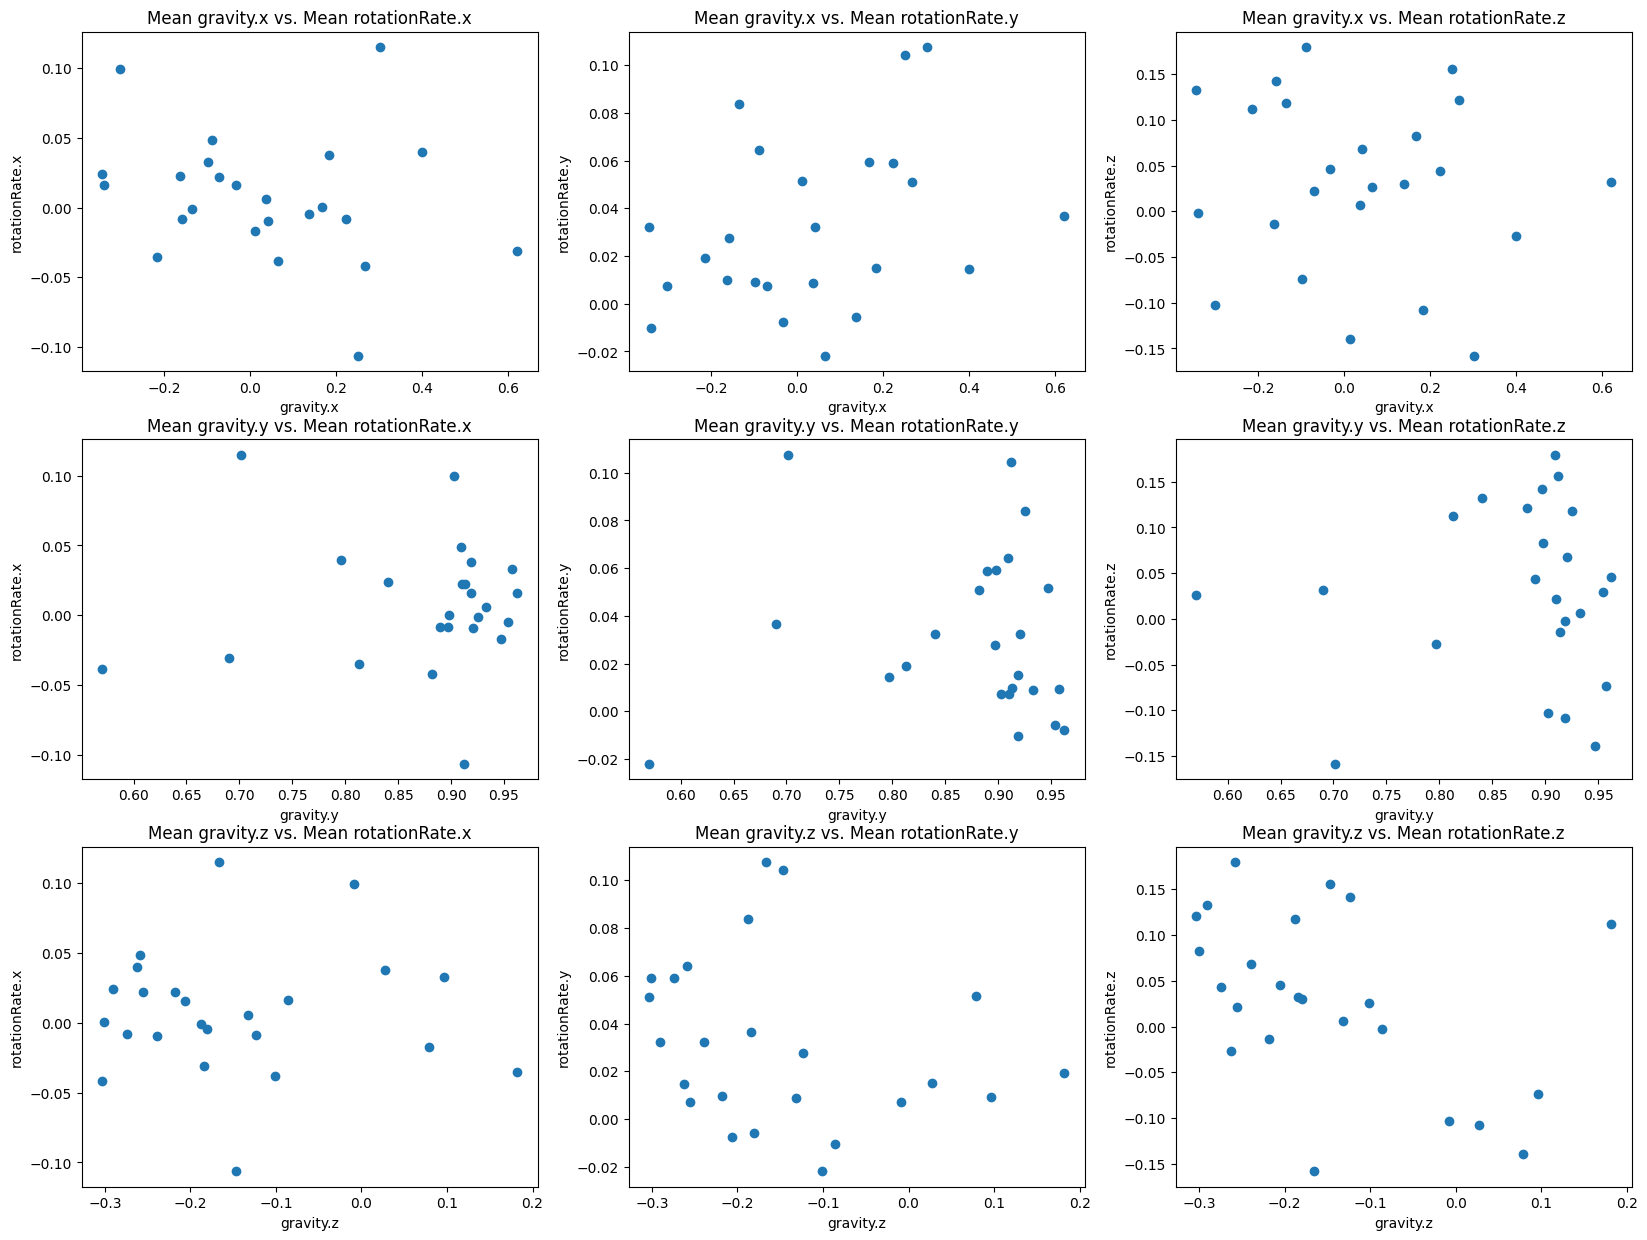

In [284]:
# for example, say we're are focusing on walking
# rotationRate.[x/y/z] vs gravity.[x/y/z]
walking_df = motion_avgs['wlk']

grav_xyz = ['gravity.x', 'gravity.y', 'gravity.z']
rotation_xyz = ['rotationRate.x', 'rotationRate.y', 'rotationRate.z']

figure, axis = plt.subplots(3, 3, figsize=(20, 15))

# scatterplot matrix for gravity.[x/y/z] vs rotationRate.[x/y/z]
for i in range(0, len(grav_xyz)):
    for j in range(0, len(rotation_xyz)):
        axis[i, j].scatter(walking_df[grav_xyz[i]], walking_df[rotation_xyz[j]])
        axis[i, j].set_title("Mean " + grav_xyz[i] + " vs. Mean " + rotation_xyz[j])
        axis[i,j].set_xlabel(grav_xyz[i])
        axis[i,j].set_ylabel(rotation_xyz[j])
plt.show()

Based on visual inspection: 
Generally speaking, there seems to be weak correlation between gravity dimensional data and rotationRate data for the walking observations
for gravity and rotationRate of different letters

gravity.x seems to be mildly correlated with rotationRate.x (negative)
gravity.y seems to be strongly correlated with rotationRate.y (negative)
gravity.z seems to be strongly correlated with rotationRate.z (negative)

Hypothesis Testing

In [275]:
# ANOVA
# Assumptions:
# alpha = 0.05

# dependent variable: metrics like gravity, rotation rate, and acceleration
# independent variable: who collects the data

# H0: there IS NO difference between individuals during walking data collection
# HA: there IS a difference between at least two different individuals during walking data collection

